In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset='salary_year_avg').copy()

job_titles = df['job_title_short'].value_counts().index[:5].tolist()
job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer']

In [3]:
df_US_top5 = df_US[df_US['job_title_short'].isin(job_titles)]


In [4]:
ordering_jobs = df_US_top5.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

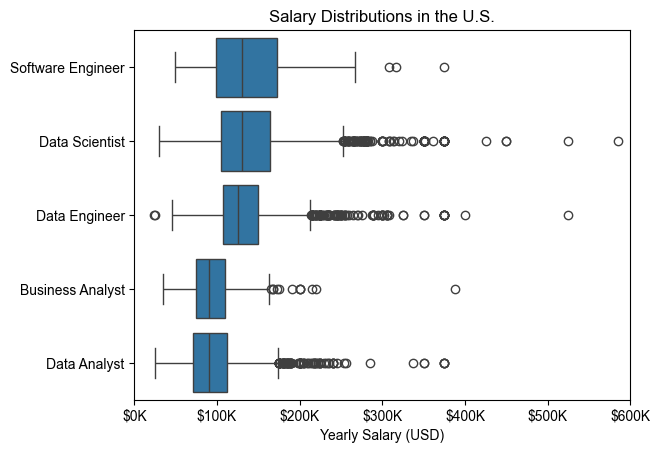

In [5]:
# Creating a boxplot
sns.boxplot(data=df_US_top5, x='salary_year_avg', y='job_title_short', order=ordering_jobs)
sns.set_theme(style='ticks')

# Setting titles and labels
plt.title('Salary Distributions in the U.S.')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)

# Formatting x-axis labels to show salaries in thousands (e.g., "$50K")
ticks_x = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

# Displaying the plot
plt.show()


In [9]:

# Filter Data Analysts in the U.S.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') &  
              (df['job_country'] == 'United States')].copy()

# Drop rows where salary_year_avg is missing
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode job_skills if it's a list
df_DA_US = df_DA_US.explode('job_skills')

# Group by skills and calculate count & median salary
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Top 10 highest median salaries
df_DA_top_pay_skills = df_DA_top_pay.sort_values(by='median', ascending=False).head(10)

# Get the top 10 most common skills based on count
df_DA_skills = df_DA_top_pay.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)




In [10]:
df_DA_top_pay_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [11]:
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12572\576458959.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_pay[::-1], x='median', y='job_skills', ax=ax[0], palette='Blues_r')
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12572\576458959.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_skills[::-1], x='median', y='job_skills', ax=ax[1], palette='Reds_r')


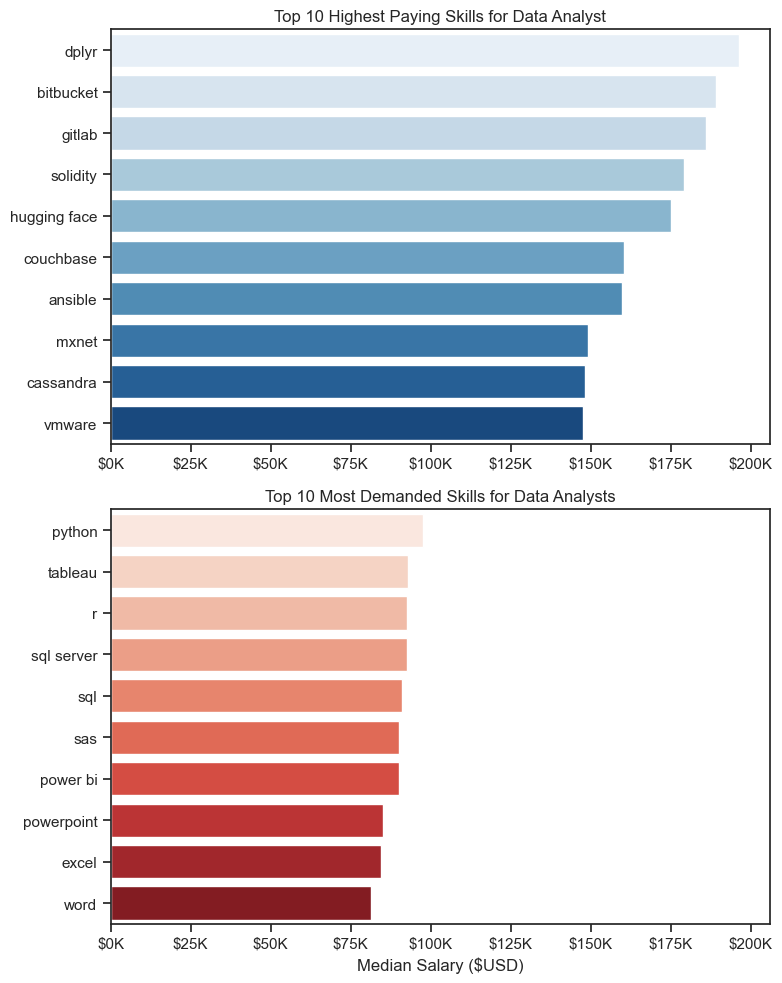

In [15]:
# Ensure the index is reset for Seaborn compatibility
df_top_pay = df_DA_top_pay_skills.reset_index()
df_skills = df_DA_skills.reset_index()

fig, ax = plt.subplots(2, 1, figsize=(8, 10))  # Adjust figure size for better layout

# Plot Top 10 Highest Paying Skills
sns.barplot(data=df_top_pay[::-1], x='median', y='job_skills', ax=ax[0], palette='Blues_r')
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000):.0f}K'))
ax[0].invert_yaxis()  # Ensure highest-paid skills appear at the top

# Plot Top 10 Most Demanded Skills
sns.barplot(data=df_skills[::-1], x='median', y='job_skills', ax=ax[1], palette='Reds_r')
ax[1].set_title('Top 10 Most Demanded Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Keep the same scale for comparison
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000):.0f}K'))
ax[1].invert_yaxis()

# Styling and display
sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
